In [ ]:

import os  
import logging  
import torch  
from diffusers import StableDiffusionPipeline  
from PIL import Image, ImageDraw, ImageFont  
from transformers import AutoTokenizer, AutoModelForCausalLM  
import warnings  
from IPython.display import display, Image as ipyimg  

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
warnings.filterwarnings("ignore")  
logging.getLogger("transformers").setLevel(logging.ERROR)  

In [ ]:

class StoryGenerator:  
    def __init__(self, model_name="gpt2"):  
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)  
        self.model = AutoModelForCausalLM.from_pretrained(model_name)  

    def generate_story(self, prompt, max_length=150):   
        try:  
            input_ids = self.tokenizer.encode(prompt, return_tensors="pt")  
            output = self.model.generate(input_ids, max_length=max_length, do_sample=True, num_return_sequences=1)  
            story = self.tokenizer.decode(output[0], skip_special_tokens=True)  

            sentences = list(dict.fromkeys(story.split(". ")))  
            return ". ".join(sentences).strip()  
        except Exception as e:  
            print(f"Error generating story: {e}")  
            return None

In [ ]:
class ImageGenerator:  
    def __init__(self):   
        self.model_id = "CompVis/stable-diffusion-v1-4"  
        self.pipeline = StableDiffusionPipeline.from_pretrained(self.model_id, torch_dtype=torch.float16, revision="fp16")  
        self.pipeline.to("cuda" if torch.cuda.is_available() else "cpu")  

    def generate_image(self, prompt, num_inference_steps=35):    
        try:  
            image = self.pipeline(prompt, num_inference_steps=num_inference_steps).images[0]  
            return image  
        except Exception as e:  
            print(f"Error during image generation: {e}")  
            return None 

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/307 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/788 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--CompVis--stable-diffusion-v1-4/snapshots/2880f2ca379f41b0226444936bb7a6766a227587/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

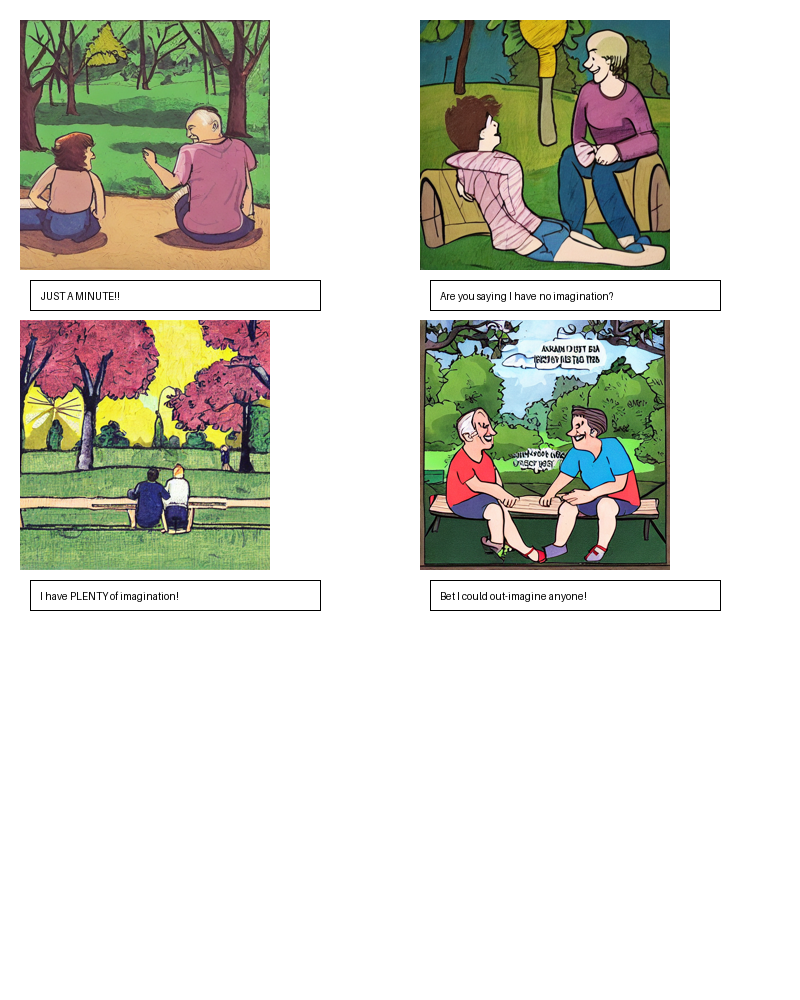

In [1]:
  
def draw_speech_bubble(draw, text, bubble_coords, font, bubble_fill=(255, 255, 255), text_fill=(0, 0, 0)):  
    x1, y1, x2, y2 = bubble_coords  
    draw.rectangle([x1, y1, x2, y2], fill=bubble_fill, outline=(0, 0, 0))  
    text_x, text_y = x1 + 10, y1 + 10  # Padding for text inside bubble  
    draw.text((text_x, text_y), text, font=font, fill=text_fill)  

if __name__ == "__main__":  
    story_gen = StoryGenerator()  
    image_gen = ImageGenerator()  

    prompt = "A sunny day with two friends talking and laughing in a park."  
    speech_texts = [  
        "JUST A MINUTE!!",  
        "Are you saying I have no imagination?",  
        "I have PLENTY of imagination!",  
        "Bet I could out-imagine anyone!"  
    ]  
  
    images = [  
        image_gen.generate_image(prompt + " Panel 1"),  
        image_gen.generate_image(prompt + " Panel 2"),  
        image_gen.generate_image(prompt + " Panel 3"),  
        image_gen.generate_image(prompt + " Panel 4"),  
    ]  

    page_width, page_height = 800, 1000  
    page = Image.new("RGB", (page_width, page_height), (255, 255, 255))  
    draw = ImageDraw.Draw(page)  

    font = ImageFont.load_default()  

    panel_width, panel_height = 350, 250  
    positions = [(20, 20), (420, 20), (20, 320), (420, 320)]  
    
    bubble_positions = [  
        (30, 280, 320, 310),  
        (430, 280, 720, 310),  
        (30, 580, 320, 610),  
        (430, 580, 720, 610),  
    ]  
    for i, (image, pos, bubble_pos, text) in enumerate(zip(images, positions, bubble_positions, speech_texts)):  
        if image: 
            image.thumbnail((panel_width, panel_height))  
            page.paste(image, pos)  
        draw_speech_bubble(draw, text, bubble_pos, font)  
    page.save("comic_style_output.png")  
    display(ipyimg(filename="comic_style_output.png"))